# Basic Info

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load dataset
df = pd.read_csv("Dataset.csv")

# Preview the top
print("First 5 rows of the dataset:")
print(df.head())

# Preview the last
print("Last 5 rows of the dataset:")
print(df.tail())

# General info
print("\nDataset Info:")
print(df.info())

# Summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))



First 5 rows of the dataset:
   OrderID        Date CustomerID  Product  Quantity  Price    Total
0        1  2024-04-12       C002    Phone         1    600   642.09
1        2  2024-12-14       C003   Laptop         2   1000  2098.39
2        3  2024-09-27       C017  Monitor         1    200   196.34
3        4  2024-04-16       C005    Phone         3    600  1955.86
4        5  2024-03-12       C017   Laptop         1   1000  1098.19
First 5 rows of the dataset:
     OrderID        Date CustomerID  Product  Quantity  Price    Total
195      196  2024-04-22       C019  Monitor         1    200   181.37
196      197  2024-11-13       C017   Laptop         1   1000  1066.13
197      198  2024-02-21       C019   Tablet         1    400   387.62
198      199  2024-09-24       C005    Phone         2    600  1265.72
199      200  2024-10-21       C009   Laptop         1   1000   972.55

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (t

# Data cleaning


In [4]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:")
print(df.duplicated().sum())

# Drop duplicates if any
df.drop_duplicates(inplace=True)




Missing Values:
OrderID        0
Date           0
CustomerID     0
Product       10
Quantity       0
Price          0
Total          6
dtype: int64

Duplicate Rows:
0


# Exploratory Data Analysis


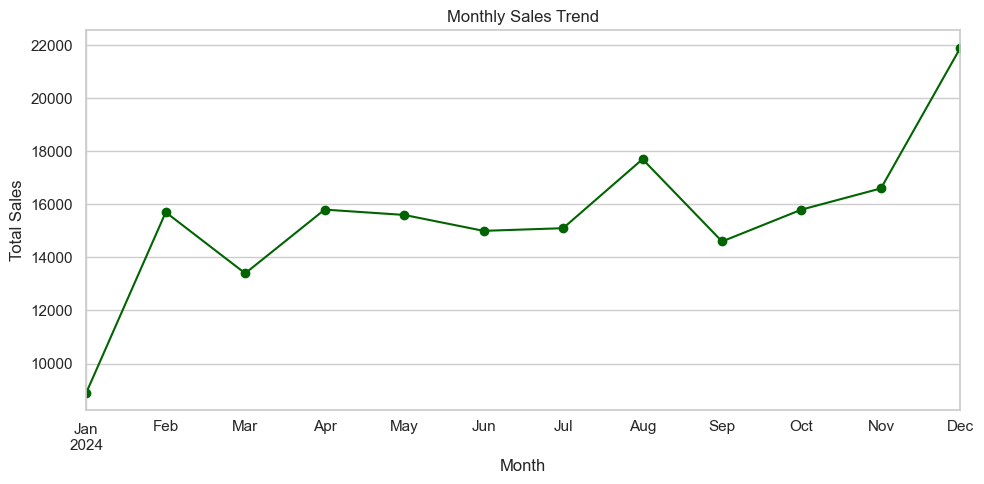

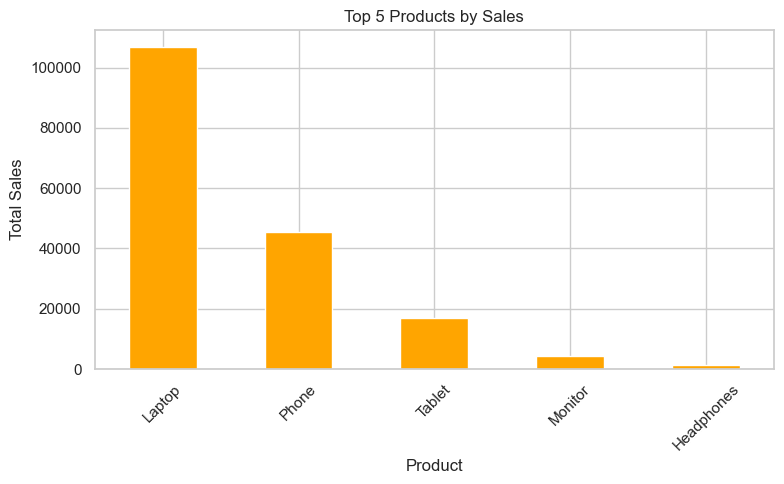

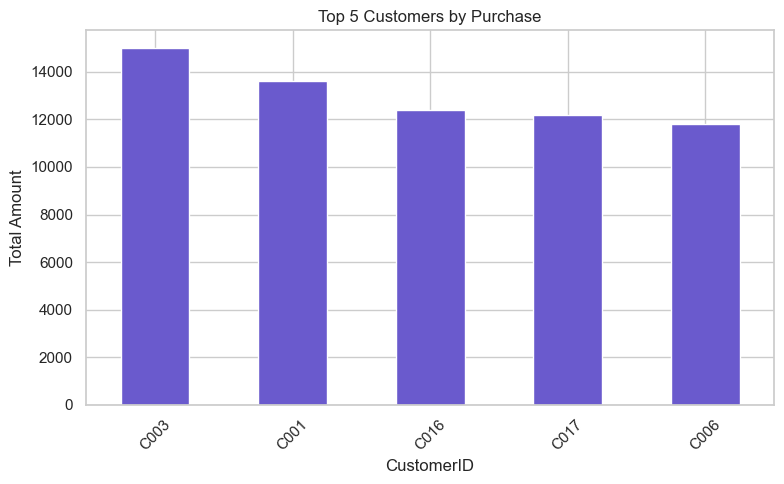

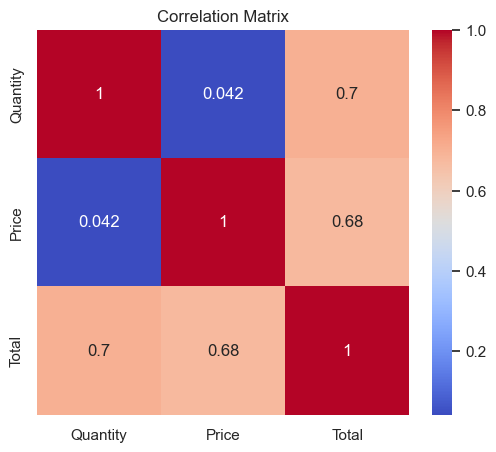

In [ ]:

#  Data Cleaning 
df['Date'] = pd.to_datetime(df['Date'])               
df['Total'] = df['Quantity'] * df['Price']            
df['Month'] = df['Date'].dt.to_period('M')            

#  Monthly Sales Trend
monthly_sales = df.groupby('Month')['Total'].sum()
plt.figure(figsize=(10,5))
monthly_sales.plot(marker='o', color='darkgreen')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

# Top 5 Products by Sales
top_products = df.groupby('Product')['Total'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8,5))
top_products.plot(kind='bar', color='orange')
plt.title("Top 5 Products by Sales")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  Top 5 Customers by Purchase
top_customers = df.groupby('CustomerID')['Total'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8,5))
top_customers.plot(kind='bar', color='slateblue')
plt.title("Top 5 Customers by Purchase")
plt.ylabel("Total Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  Correlation Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df[['Quantity', 'Price', 'Total']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()
